In [53]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
from sklearn.metrics import mean_squared_error


In [54]:
df = pd.read_csv("synthetic_polynomial_dataset_degree7.csv")

In [55]:
df.head()

,X,y
0,-0.250920,-2.413756
1,0.901429,0.018650
2,0.463988,-2.045739
3,0.197317,-3.307116
4,-0.687963,0.842323


Text(0.5, 1.0, 'X and y')

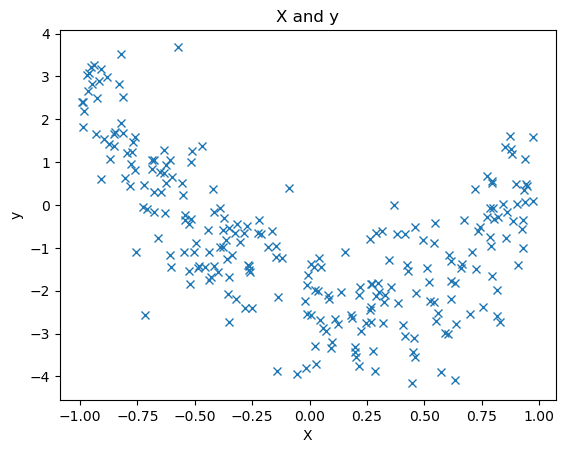

In [56]:
X = df[['X']]
y = df['y']

plt.plot(X,y,'x')
plt.xlabel('X')
plt.ylabel('y')
plt.title('X and y')

In [57]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=0)

poly = PolynomialFeatures(degree=7)
reg = LinearRegression(fit_intercept=False)

X_train_poly = poly.fit_transform(X_train)
X_test_poly = poly.fit_transform(X_test)

reg.fit(X_train_poly,y_train)

LinearRegression(fit_intercept=False)

In [58]:
reg.score(X_test_poly,y_test)

0.5930108445902877

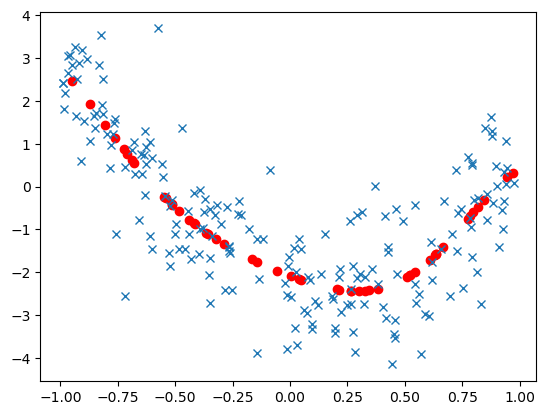

In [59]:
y_pred = reg.predict(X_test_poly)
plt.plot(X_train,y_train,'x',label ='train')
plt.scatter(X_test,y_pred,c='red')

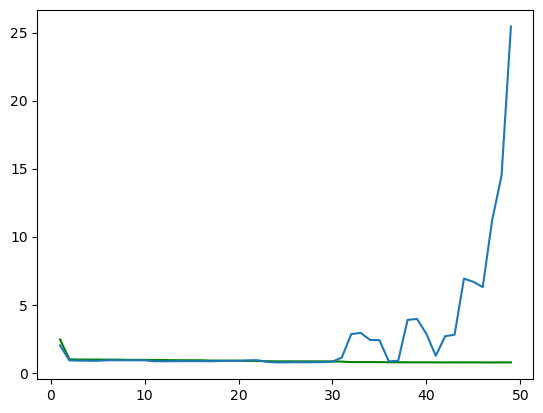

In [60]:
train_mse = []
test_mse = []

for i in range (1, 50):
    poly = PolynomialFeatures(degree=i)

    X_train_poly = poly.fit_transform(X_train)
    X_test_poly = poly.fit_transform(X_test)

    reg.fit(X_train_poly,y_train)
    train_mse.append(mean_squared_error(reg.predict(X_train_poly),y_train))
    test_mse.append(mean_squared_error(reg.predict(X_test_poly),y_test))
z = list(range(1,50))
plt.plot(z,train_mse,c='green')
plt.plot(z,test_mse)
    